##  Principal Components Analysis (PCA) - Iris Dataset

### Step 1. Import Necessary Libraries

In [16]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
import pylab as pl
from itertools import cycle

### Step 2. Load the Iris Dataset
The Iris dataset contains 150 samples, with each sample having 4 features (sepal length, sepal width, petal length, petal width) and 3 classes (species).

In [17]:
iris = load_iris()
numSamples, numFeatures = iris.data.shape

print(numSamples)
print(numFeatures)
print(list(iris.target_names))

150
4
['setosa', 'versicolor', 'virginica']


### Step 3. Apply PCA for Dimensionality Reduction
We'll reduce the dataset from 4 dimensions to 2 using PCA, allowing us to visualize it in a 2D plot.

In [18]:
X = iris.data
pca = PCA(n_components=2, whiten=True).fit(X)
X_pca = pca.transform(X)
print(pca.components_)

[[ 0.36138659 -0.08452251  0.85667061  0.3582892 ]
 [ 0.65658877  0.73016143 -0.17337266 -0.07548102]]


In [19]:
variance_ratio = pca.explained_variance_ratio_
print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))
 

for i in range(len(variance_ratio)):
    print(f"PC{i+1}: {variance_ratio[i]*100:.2f}% variance")

[0.92461872 0.05306648]
0.9776852063187924
PC1: 92.46% variance
PC2: 5.31% variance


The explained variance tells you how much of the data's variance is captured by each principal component. The sum of the explained variances for the first two components should be close to 1, indicating that most of the variance in the dataset can be captured in these two dimensions.

### Step 4. Visualize the PCA-Transformed Data
We can now plot the two principal components, coloring the points by their true species labels to see how well-separated the data is in 2D space.

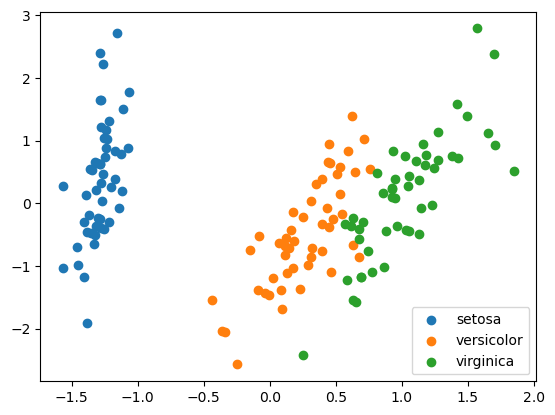

In [20]:

colors = cycle('rgd')
target_ids = range(len(iris.target_names))
pl.figure()

for i,c, label in zip(target_ids, colors, iris.target_names):
    pl.scatter(X_pca[iris.target == i, 0], X_pca[iris.target == i, 1], label = label)
 
pl.legend()
pl.show()

### Interpretation of PCA Visualization:
- Setosa (blue points): Likely to form a distinct cluster, as the species is relatively different from the others in the dataset.
- Versicolor and Virginica (orange and green points): These two species might show some overlap, as they are more similar to each other compared to setosa.

### Step 5. Apply K-Means Clustering:
We apply K-Means clustering to the PCA-reduced data, asking it to form 3 clusters. The number 3 is chosen because we know there are three species of iris in the dataset.

In [21]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_pca)
labels = kmeans.labels_

c:\Users\angel\Anaconda\envs\dataanalytics\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


### Step 6. Visualize the Clusters:
The result of K-Means clustering is visualized in a 2D plot, with different colors representing the different clusters found by K-Means.



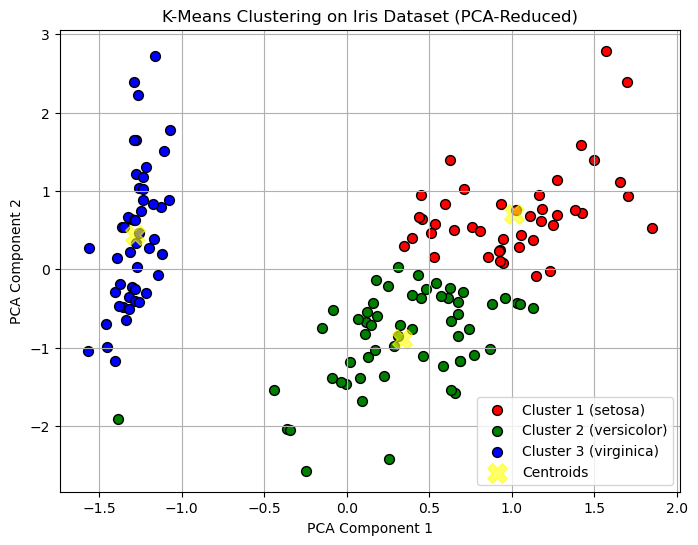

In [22]:
import matplotlib.pyplot as plt

# Define colors for the clusters
colors = cycle(['red', 'green', 'blue'])

plt.figure(figsize=(8, 6))

for color, i, target_name in zip(colors, [0, 1, 2], iris.target_names):
    plt.scatter(
        X_pca[kmeans.labels_ == i, 0], 
        X_pca[kmeans.labels_ == i, 1],
        color=color, 
        label=f'Cluster {i+1} ({target_name})',
        edgecolor='k',
        s=50
    )

# Plot the cluster centers
centers = kmeans.cluster_centers_
plt.scatter(
    centers[:, 0], 
    centers[:, 1],
    c='yellow', 
    s=200, 
    alpha=0.6, 
    marker='X',
    label='Centroids'
)

plt.title('K-Means Clustering on Iris Dataset (PCA-Reduced)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.grid(True)
plt.show()


### Step 7. Evaluate Clustering:
We evaluate how well the clusters found by K-Means correspond to the actual species labels using the Adjusted Rand Index (ARI). This score measures the similarity between the true labels and the clusters.

In [24]:
ari = adjusted_rand_score(iris.target, labels)
print(f'Adjusted Rand Index (ARI): {ari:.2f}')  # ARI score tells how well clusters match the true labels

Adjusted Rand Index (ARI): 0.53


Based on the results from [7_KMeans.ipynb](7_KMeans.ipynb) where we have evaluated the clustering directly (without previously applying dimensionality reduction through PCA), ARI score was higher (ari=0.73). So, why this is happening? Why K-Means Without PCA Performed Better?
- **More features = More separation:** The original dataset has four features, and K-Means benefits from all of them. The petal length and petal width, in particular, provide strong separation between the species. PCA reduces the feature space, which may remove or distort the separation power of these features.
- **Cluster separation:** In the original 4D space, the Setosa species is often well-separated, but Versicolor and Virginica are closer together and harder to distinguish. By reducing the dataset to 2 principal components, you may lose some of the finer distinctions between Versicolor and Virginica, resulting in poorer clustering accuracy.

### In conclusion:
- **PCA isn’t always needed:** In datasets like the Iris dataset, where the number of features is relatively small and the features are meaningful, applying K-Means directly (without PCA) can result in better clustering performance.
- **Use PCA for visualization:** Even though PCA resulted in a lower ARI score, it was still useful for reducing the data to 2 dimensions for visualization purposes, helping to see the structure of the dataset and how K-Means separates the clusters in 2D space.

